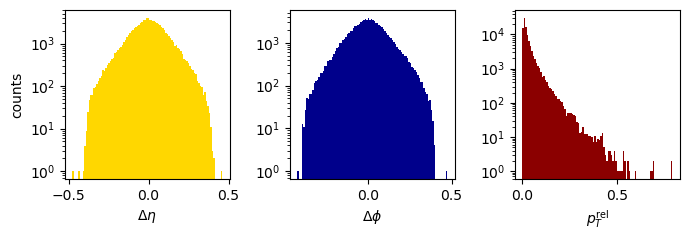

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from DynGenModels.datamodules.jetnet.datasets import JetNetDataset
from DynGenModels.datamodules.jetnet.configs import JetNet_Configs

configs = JetNet_Configs(data_dir="../../data/jetnet", jet_types="t")
tops = JetNetDataset(configs)

def feature_plots(jetnet_data, features=[r'$\Delta\eta$', r'$\Delta\phi$', r'$p^{\rm rel}_T$'], num_particles=100000, color='blue'):
    _, axs = plt.subplots(1, 3, figsize=(7, 2.5))
    axs[0].hist(jetnet_data[..., 0].flatten()[:num_particles], bins=100,log=True, color='gold')
    axs[1].hist(jetnet_data[..., 1].flatten()[:num_particles], bins=100, log=True, color='darkblue')
    axs[2].hist(jetnet_data[..., 2].flatten()[:num_particles], bins=100, log=True, color='darkred')
    axs[0].set_xlabel(features[0])
    axs[1].set_xlabel(features[1])
    axs[2].set_xlabel(features[2])
    axs[0].set_ylabel('counts')
    plt.tight_layout()
    plt.show()


feature_plots(tops.particles)


In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt 

from DynGenModels.trainer.trainer import DynGenModelTrainer
from DynGenModels.configs.jetnet_configs import JetNet_EPiC_CondFlowMatch as Configs

configs = Configs(data_dir = '../../data/jetnet',
                  features = ['eta_rel', 'phi_rel', 'pt_rel'],
                  preprocess=['standardize'],
                  num_particles = 30,
                  jet_types = 't',
                  data_split_fracs = [0.8, 0.2, 0.0],
                  epochs = 3,
                  batch_size = 1024,
                  lr = 1e-3,
                  dim_hidden = 128, 
                  num_epic_layers = 6,
                  sigma = 1e-5,
                  solver='midpoint',
                  num_sampling_steps=200)

#...set working directory for results:

configs.set_workdir(path='../../results', save_config=True)

#...define setup and train model :

from DynGenModels.datamodules.jetnet.datasets import JetNetDataset 
from DynGenModels.datamodules.jetnet.dataloader import JetNetDataLoader 
from DynGenModels.models.deep_sets import EPiC
from DynGenModels.dynamics.cnf.condflowmatch import SimplifiedCondFlowMatching

tops = JetNetDataset(configs)
dataloader = JetNetDataLoader(tops, configs)
net = EPiC(configs)
dynamics = SimplifiedCondFlowMatching(net, configs)
cfm = DynGenModelTrainer(dynamics=dynamics, dataloader=dataloader, configs=configs)
cfm.train()

#=================================================================================
INFO: created directory: ../../results/JetNet.CondFlowMatch.EPiC.2023.10.08_20h27
#=================================================================================
+--------------------+----------------------------------+
| Parameters         | Values                           |
+--------------------+----------------------------------+
| data_dir           | ../../data/jetnet                |
| data_name          | JetNet                           |
| features           | ['eta_rel', 'phi_rel', 'pt_rel'] |
| dim_input          | 3                                |
| num_particles      | 30                               |
| jet_types          | t                                |
| preprocess         | ['standardize']                  |
| device             | cpu                              |
| data_split_fracs   | [0.8, 0.2, 0.0]                  |
| batch_size         | 1024                             

epochs:   0%|          | 0/3 [00:00<?, ?it/s]

In [4]:
from DynGenModels.pipelines.SamplingPipeline import FlowMatchPipeline 
from DynGenModels.datamodules.jetnet.dataprocess import PostProcessJetNetData 

pipeline = FlowMatchPipeline(trained_model=cfm, 
                             source_input=torch.randn(10000, 30, 3),
                             configs=configs, 
                             postprocessor=PostProcessJetNetData)

AttributeError: 'DynGenModelTrainer' object has no attribute 'last_epoch_model'

### Xcheck post-processing